In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import lsst.sims.maf.db as db
import lsst.sims.maf.metrics as metrics
import lsst.sims.maf.slicers as slicers
import lsst.sims.maf.metricBundles as metricBundles
import lsst.sims.maf.plots as plots
import lsst.sims.maf.metricBundles as metricBundles


In [2]:
# Set up the database connection
opsdb = db.OpsimDatabase('enigma_1189_sqlite.db')
outDir = 'AltAz'
resultsDb = db.ResultsDb(outDir=outDir)

Healpix slicer using NSIDE=64, approximate resolution 54.967783 arcminutes
Querying database with constraint night between 0 and 365
Found 272657 visits
Running:  ['opsim_Nvisits_as_function_of_Alt_Az_night_between_0_and_365_HEAL']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
Plotting figures with night between 0 and 365 sqlconstraint now.
Plotting complete.


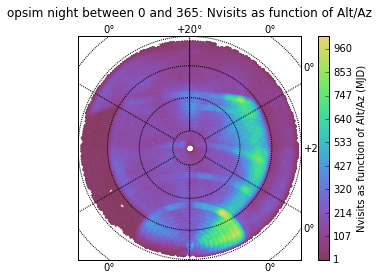

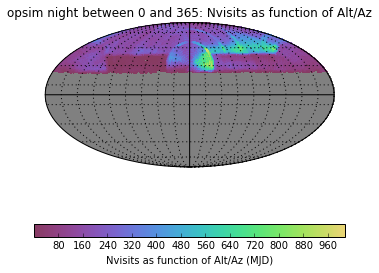

In [5]:
slicer = slicers.HealpixSlicer(nside=64, latCol='zenithDistance', lonCol='azimuth', useCache=False)
metric = metrics.CountMetric('expMJD', metricName='Nvisits as function of Alt/Az')
plotDict = {} #{'cmap':'viridis'}

lowerLimit = 0
upperLimit = 365
bundleList = []
plotFuncs = [plots.LambertSkyMap(), plots.HealpixSkyMap()]
sql = 'night between %i and %i' % (lowerLimit,upperLimit)
bundle = metricBundles.MetricBundle(metric, slicer,sql,
                                    plotFuncs=plotFuncs, plotDict=plotDict)
bundleList.append(bundle)
bDict = metricBundles.makeBundlesDictFromList(bundleList)
bgroup = metricBundles.MetricBundleGroup(bDict, opsdb, outDir=outDir, resultsDb=resultsDb)
bgroup.runAll()
bgroup.plotAll(closefigs=False)